Universidade Federal do Rio Grande do Sul (UFRGS)   
Programa de Pós-Graduação em Engenharia Civil (PPGEC)   

### Trabalho 1 - Resposta de um sistema com 1 gdl a uma excitação na base
### Espectro de Pseudo Acelerações

---
_Aluna: Jamile Maria Araujo Tavares_

In [1]:
# Importing Python modules required for this notebook

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from MRPy import MRPy


## 1. Introdução <a name="section_1"></a> 

Para complementar o estudo teórico da disciplina de Introdução à Teoria de Vibrações (PEC00025) foi sugerido o presente trabalho sob orientação do Prof. Marcelo M. Rocha.

Para o trabalho foi utilizado o aplicativo android ```iVNH``` (Bosch) para medir o tempo e a aceleração de uma superfície em vibração. A superfície escolhida foi uma mesa de material plástico e nela foram aplicadas três carga pela própria discente, essas cargas se trataram de forças exercida manualmente sobre a mesa. No momento de aplicação das forças um aparelho android estava localizado no centro da mesa, conforme a Figura 1, enquanto o aplicativo estava coletando os dados de tempo e aceleração nas coordenadas x, y e z. Para aplicação no trabalho foi utilizada apenas a aceleração em z.

O aplicativo gerou um arquivo no formato _.csv_ que foi utilizado como dado de entrada no Python. A leitura desse arquivo no Python foi programada pelo professor Marcelo.

<img src="fotomesa.jpeg" width="200" height="200">

## 2. Estrutura em equilíbrio dinâmico amortecido e em vibração livre <a name="section_2"></a> 

Uma estrutura que esteja em equilíbrio dinâmico amortecido e em vibração livre apresenta a seguinte equação ordinária (EDO):

$$ \ddot{u} + 2 \zeta \omega_{\rm n} \dot{u} + \omega_{\rm n}^2 u = -a_G(t) $$

A solução dessa equação fornece o deslocamento (u), que é a incógnita necessária para calcular a aceleração de pico, pela fórmula seguinte:

$$ a_{pico} = {w_n}^2u_{pico} $$

As propriedades mecânicas do problema, que são entradas para a solução da EDO, se encontram na célula abaixo.


In [2]:
m = 1.0        # system mass in kg
Tn = np.linspace(0.1, 10, 100)
fn=1/Tn        # natural frequency in Hz
zt = 0.01      # damping as ratio of critical
u0 = 0.        # initial displacement
v0 = 0.        # initial velocity


A frequência natural (fn) varia dentro de um intervalo de 0.1 a 10

### 2.1 Cálculo do espectro de pseudo aceleração <a name="section_2"></a> 

Após a vibração ter sido medida com o aplicativo foi gerado um arquivo de saída pelo próprio app, nomeado de ```'mesa1'```, a leitura desse arquivo se deu através do módulo ```MRPy```, desenvolvido pelo orientador do trabalho. Ainda foram plotados os gráficos de tempo vs aceleração, respectivamente, em x, y e z. Conforme é possível visualizar ao executar a célula abaixo:


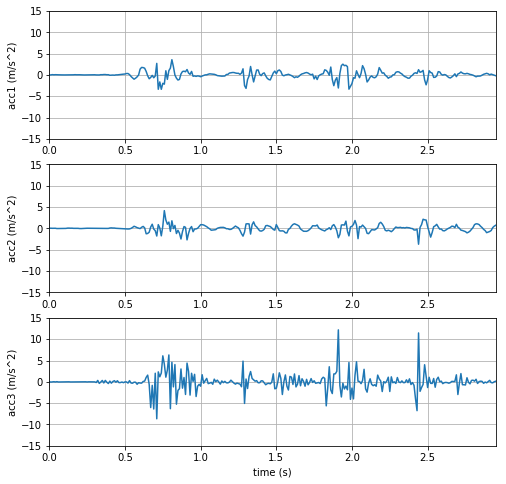

In [3]:
data = MRPy.from_file('mesa13', form='invh').zero_mean()
az = MRPy(data[2], data.fs)  
t    = data.t_axis()

plt.figure(1, figsize=(8, 8), clear=True)

for kX, acc in enumerate(data):
    
    plt.subplot(3, 1 ,kX+1)
    plt.plot(t, acc)

    plt.xlim(0, data.Td);   
    plt.ylim(-15, 15);
    plt.ylabel('acc{0} (m/s^2)'.format(kX+1)) 

    plt.grid(True) 

plt.xlabel('time (s)');


O código ```MRPy``` também possui a função de resolver a EDO pelo método das diferenças finitas e pelo método de Duhamel.
A solução da EDO para o problema foi encontrada através do método de Duhamel.


In [4]:
Upico=np.zeros((1,len(fn)))

for i in range(0, len(fn)):
    u_DH = az.sdof_Duhamel(fn[i], zt, u0, v0)/m
    Upico[0,i] = max(u_DH[0])  #Deslocamento de pico para cada fn

Por fim, foi possível plotar o gráfico do tempo vs aceleração de pico do sistema.

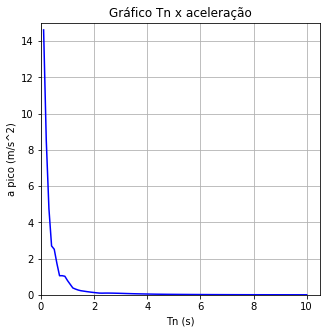

In [5]:
#Gráfico de Tn x aceleração

apico=np.zeros((1,len(fn)))
for i in range(0, len(fn)):
    apico[0,i] = ((2*(np.pi)*fn[i])**2)*Upico[0,i] #Aceleração de pico para cada fn
    
Tapico=np.transpose(apico)
plt.figure(1, figsize=(5, 5), clear=True)

plt.plot(Tn, Tapico, 'b')

plt.xlim(0, 10.5);        plt.xlabel('Tn (s)') 
plt.ylim(-0.001, 15);   plt.ylabel('a pico (m/s^2)')
plt.title('Gráfico Tn x aceleração')
plt.grid(True)


### 2.2 Periodograma <a name="section_2"></a> 

Por último foi plotado o gráfico frequência vs aceleração em z, que representa o periodograma do sistema experimentado.

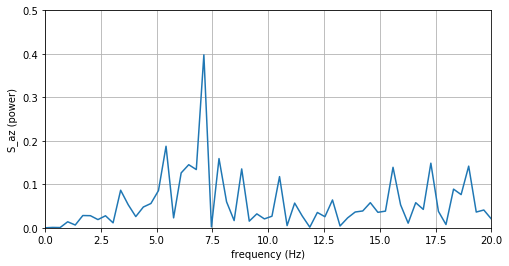

In [6]:
#Gráfico de fn x aceleração em z

Saz, fs = az.periodogram()
f       = az.f_axis()

plt.figure(5, figsize=(8, 4), clear=True)
plt.plot(f, Saz[0])

plt.xlim(0, 20);   plt.xlabel('frequency (Hz)')
plt.ylim(0,  0.5);   plt.ylabel('S_az (power)') 

plt.grid(True) 

Como o sinal do acelerômetro tem uma forte densidade de energia em torno de 7Hz é possível que o sistema mecânico apresenta uma frequência de vibração natural próxima a este valor.

## REFERÊNCIAS <a name="section_3"></a> 
ROCHA, M. M. Class 05 - Numerical integration: finite differences and Duhamel techniques.
Disponível em: < https://nbviewer.jupyter.org/github/mmaiarocha/PEC00025/blob/master/resources/Class_05_NumericalIntegration.ipynb?flushcache=true>

ROCHA, M. M. Class 06 - - The Fourier Transform.
Disponível em: <https://nbviewer.jupyter.org/github/mmaiarocha/PEC00025/blob/master/resources/Class_06_FourierTransform.ipynb?flushcache=true>